In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

In [2]:
train_data = pd.read_csv("train_preprocessed.csv")

In [3]:
train_data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifer_code_DR,Item_Identifer_code_FD,Item_Identifer_code_NC,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,-0.751014,-0.969852,1.752511,-0.139681,1,0,0,0,0,0,...,0,1,0,0,0,1,0,FDA15,OUT049,3735.1380
1,-1.477653,-0.907063,-1.493696,-1.334228,0,1,0,0,0,0,...,0,0,1,0,1,0,0,DRC01,OUT018,443.4228
2,1.011839,-0.956000,0.009874,-0.139681,1,0,0,0,0,0,...,0,1,0,0,0,1,0,FDN15,OUT049,2097.2700
3,1.377308,-1.281712,0.661838,-0.020226,0,1,0,0,0,0,...,1,0,0,0,0,1,0,FDX07,OUT010,732.3800
4,-0.830557,-1.281712,-1.403623,1.293777,1,0,0,0,0,0,...,0,1,0,0,0,0,1,NCD19,OUT013,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.274495,-0.178196,1.184137,1.293777,1,0,0,0,0,0,...,0,1,0,0,0,1,0,FDF22,OUT013,2778.3834
8519,-0.948797,-0.368666,-0.529083,-0.498045,0,1,1,0,0,0,...,0,1,0,0,0,1,0,FDS36,OUT045,549.2850
8520,-0.471537,-0.597910,-0.900101,-0.736955,1,0,0,0,0,0,...,0,1,0,0,0,0,1,NCJ29,OUT035,1193.1136
8521,-1.200326,1.540475,-0.610001,-1.334228,0,1,0,0,0,0,...,0,0,1,0,0,1,0,FDN46,OUT018,1845.5976


In [9]:
X = train_data.drop(columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'], axis = 0)

In [10]:
X

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifer_code_DR,Item_Identifer_code_FD,Item_Identifer_code_NC
0,-0.751014,-0.969852,1.752511,-0.139681,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,-1.477653,-0.907063,-1.493696,-1.334228,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,1.011839,-0.956000,0.009874,-0.139681,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,1.377308,-1.281712,0.661838,-0.020226,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4,-0.830557,-1.281712,-1.403623,1.293777,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.274495,-0.178196,1.184137,1.293777,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
8519,-0.948797,-0.368666,-0.529083,-0.498045,0,1,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
8520,-0.471537,-0.597910,-0.900101,-0.736955,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
8521,-1.200326,1.540475,-0.610001,-1.334228,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [12]:
y = train_data['Item_Outlet_Sales']

In [26]:
model = RandomForestRegressor(oob_score= True)

In [27]:
model.fit(X,y)

RandomForestRegressor(oob_score=True)

<AxesSubplot:>

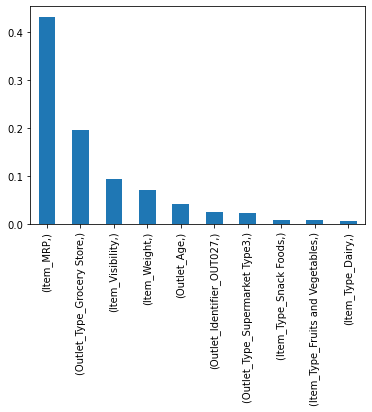

In [28]:
pd.Series(model.feature_importances_, index = [X.columns]).sort_values(ascending= False)[:10].plot(kind = 'bar')

In [29]:
model.oob_score

True

In [30]:
model.oob_score_

0.5562215215625588